<a href="https://colab.research.google.com/github/CobaMasa/PythonMachineLearningProgramming/blob/master/chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# library
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
print('shape: ', df.shape)
y = df.iloc[:, 1].values
X = df.iloc[:, 2:].values

# Dumming
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

shape:  (569, 32)


In [3]:
# Putting all transformers & estimators together with Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression()
)
pipe_lr.fit(X_train, y_train)
print('score: {:.5f}'.format(pipe_lr.score(X_test, y_test)))

score: 0.94737


In [4]:
# STRATIFIED k-fold cross varidation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: {}, Class dist: {}, ACC: {:.5f}'.format(k+1, (len(train), len(test)), score))

print('\nAverage accuracy: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

Fold: 1, Class dist: (409, 46), ACC: 0.97826
Fold: 2, Class dist: (409, 46), ACC: 0.97826
Fold: 3, Class dist: (409, 46), ACC: 0.97826
Fold: 4, Class dist: (409, 46), ACC: 0.97826
Fold: 5, Class dist: (409, 46), ACC: 0.86957
Fold: 6, Class dist: (410, 45), ACC: 0.95556
Fold: 7, Class dist: (410, 45), ACC: 0.97778
Fold: 8, Class dist: (410, 45), ACC: 0.86667
Fold: 9, Class dist: (410, 45), ACC: 0.95556
Fold: 10, Class dist: (410, 45), ACC: 0.93333

Average accuracy: 0.947 +/- 0.042


In [5]:
# do the above code easily with cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10)
print('Averate accuracy: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

Averate accuracy: 0.947 +/- 0.042


## Learning & Validation Curves
- Learning Curve: train & validation scores adjusting SMAPLE SIZE of training.
- Validation Curve: train & validation scores adjusting HYPER-PARAMETER's values

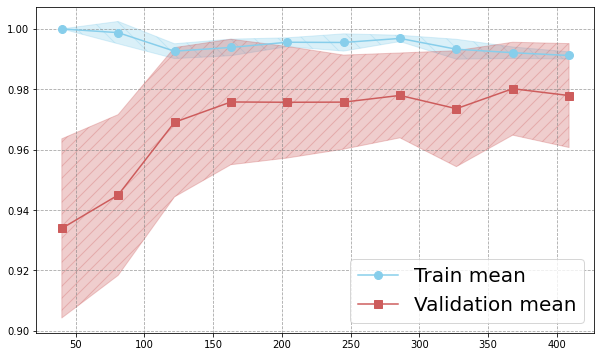

In [6]:
# Learning curce
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))
train_size, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6))
plt.plot(train_size, train_mean, label='Train mean', marker='o', c='skyblue', markersize=8)
plt.plot(train_size, test_mean, label='Validation mean', marker='s', c='indianred', markersize=8)

plt.fill_between(train_size, train_mean-train_std, train_mean+train_std, color='skyblue', alpha=0.3, hatch='\\')
plt.fill_between(train_size, test_mean-test_std, test_mean+test_std, color='indianred', alpha=0.3, hatch='//')

plt.legend(loc='lower right', fontsize=20)
plt.grid(alpha=0.7, c='gray', ls='--')

plt.show();

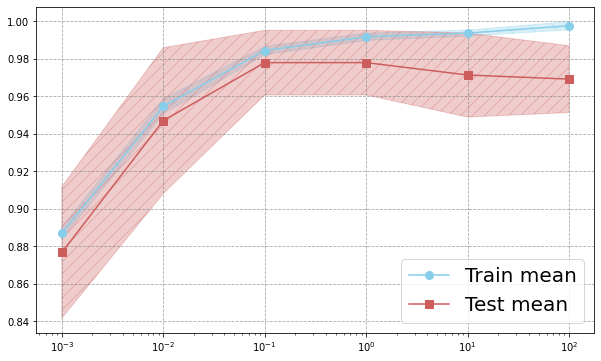

In [7]:
# Validation curce
from sklearn.model_selection import validation_curve
param_range = [10**pwr for pwr in range(-3, 3)]
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=500))
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='logisticregression__C', param_range=param_range, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Train mean', marker='o', c='skyblue', markersize=8)
plt.plot(param_range, test_mean, label='Test mean', marker='s', c='indianred', markersize=8)

plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, color='skyblue', alpha=0.3, hatch='\\')
plt.fill_between(param_range, test_mean-test_std, test_mean+test_std, color='indianred', alpha=0.3, hatch='//')

plt.legend(loc='lower right', fontsize=20)
plt.grid(alpha=0.7, c='gray', ls='--')
plt.xscale('log')
plt.show();

In [8]:
# Grid search with k-fold cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'n_estimators': [i*100 for i in range(1, 3)],
    'max_depth': [i for i in range(1, 8)],
    'criterion': ['gini', 'entropy']
}
gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=model_params, scoring='accuracy', cv=5, n_jobs=-1)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV ACC: {:.5f} +/- {:.5f}'.format(np.mean(scores), np.std(scores)))

CV ACC: 0.95824 +/- 0.02544
